# IMPORTING THE DATASET

In [1]:
import pandas as pd
data=pd.read_csv("C://Users//BijliBeyon//OneDrive//Desktop//NLP//reviews_data.csv")

In [2]:
data.head()

name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                                      ['No Images']  
2  ['https://media.consumeraffairs.com/files/cach...  
3                                      ['No Images']  
4  ['https://media.consumeraffairs.com/files/cach...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


# DATA PE-PROCESSING


In [4]:
#removing the unwanted columns
data.drop(['name','Image_Links'],axis=1,inplace=True)
#inplace is just used modifiy the changes in the same file 

In [5]:
data.isnull().sum()

location      0
Date          0
Rating      145
Review        0
dtype: int64

In [6]:
# we drop the missing rating rows because if we impute and it mismatches with the review it gives a improper analysis
rows_with_nan = data[data.isna().any(axis=1)]

data.dropna(inplace=True)

# or data.drop(subset='Rating',inplace=True) to specify the column to check for null values

In [7]:
print(rows_with_nan)

                location                    Date  Rating  \
704      Kansas City, MO  Reviewed July 25, 2011     NaN   
705      Kansas City, MO  Reviewed July 25, 2011     NaN   
706           Revere, ma  Reviewed June 26, 2011     NaN   
707  Macclesfield, Other  Reviewed Jan. 13, 2011     NaN   
708          Jenison, MI   Reviewed Jan. 4, 2011     NaN   
..                   ...                     ...     ...   
845     Agoura Hills, CA  Reviewed July 13, 2006     NaN   
846         Goodrich, MI   Reviewed Jan. 3, 2005     NaN   
847   Valley Village, CA   Reviewed Nov. 5, 2004     NaN   
848        Fallbrook, CA  Reviewed Oct. 20, 2004     NaN   
849           Ramsey, NJ  Reviewed July 19, 2000     NaN   

                                                Review  
704  I just wanted to amend my email the I sent to ...  
705  Recently, I have gone to your Starbucks at Bar...  
706  Upon my first visit to this location on my way...  
707  Recently, British Royal Marines in Iraq wrote 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 749
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  705 non-null    object 
 1   Date      705 non-null    object 
 2   Rating    705 non-null    float64
 3   Review    705 non-null    object 
dtypes: float64(1), object(3)
memory usage: 27.5+ KB


### formatting the columns

In [9]:
#in the location column we have city,state, here we split it into two columns different city and state for further analysis and dropping the location column
data.insert(1,"City",data["location"].str.split(",").str[0])
data.insert(1,"State",data["location"].str.split(",").str[1])


In [10]:
data.drop(['location'],inplace=True,axis=1)

In [11]:
#Formating the date column 
data['Date']=data['Date'].str.replace("Reviewed","",case=False,regex=False)
#regex=False, you're essentially saying, "Don't use any special rules or patterns; just treat my text as it is."

In [12]:
#changing the data types of date and rating
data=data.astype({'Date':'datetime64'})
data=data.astype({'Rating':'int64'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 749
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   703 non-null    object        
 1   City    705 non-null    object        
 2   Date    705 non-null    datetime64[ns]
 3   Rating  705 non-null    int64         
 4   Review  705 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 33.0+ KB


In [14]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day_of_the_week']=data['Date'].dt.dayofweek #to get which day the following date corresponds to
data['Day']=data['Date'].dt.day

In [15]:
data

State           City       Date  Rating  \
0      TX  Wichita Falls 2023-09-13       5   
1      FL         Apopka 2023-07-16       5   
2      PA  Cranberry Twp 2023-07-05       5   
3      WA        Seattle 2023-05-26       5   
4      OR        Gresham 2023-01-22       5   
..    ...            ...        ...     ...   
700    CA         Cotati 2011-10-02       1   
701    ON       Oakville 2011-08-31       3   
702    NY             Ny 2011-08-24       1   
703    CA      La Puente 2011-08-15       1   
749    IL        Beecher 2010-02-06       5   

                                                Review  Month  Year  \
0    Amber and LaDonna at the Starbucks on Southwes...      9  2023   
1    ** at the Starbucks by the fire station on 436...      7  2023   
2    I just wanted to go out of my way to recognize...      7  2023   
3    Me and my friend were at Starbucks and my card...      5  2023   
4    I’m on this kick of drinking 5 cups of warm wa...      1  2023   
..                                                 ...    ...   ...   
700  I ordered Via Starbucks coffee online. I recei...     10  2011   
701  My name is Ric **, I am journalist by professi...      8  2011   
702   The bagel was ice cold, not cut and not toasted.      8  2011   
703  In the morning of Monday, August 15, 2011, at ...      8  2011   
749  I found the coffee at Starbucks overrated and ...      2  2010   

     Day_of_the_week  Day  
0                  2   13  
1                  6   16  
2                  2    5  
3                  4   26  
4                  6   22  
..               ...  ...  
700                6    2  
701                2   31  
702                2   24  
703                0   15  
749                5    6  

[705 rows x 9 columns]

In [16]:
#data["is_month_end"]=data['Date'].dt.is_month_end
#data["is_month_start"]=data['Date'].dt.is_month_start
#we can use this but month_start takes only 1 and end takes only 30 or 31

In [17]:
data

State           City       Date  Rating  \
0      TX  Wichita Falls 2023-09-13       5   
1      FL         Apopka 2023-07-16       5   
2      PA  Cranberry Twp 2023-07-05       5   
3      WA        Seattle 2023-05-26       5   
4      OR        Gresham 2023-01-22       5   
..    ...            ...        ...     ...   
700    CA         Cotati 2011-10-02       1   
701    ON       Oakville 2011-08-31       3   
702    NY             Ny 2011-08-24       1   
703    CA      La Puente 2011-08-15       1   
749    IL        Beecher 2010-02-06       5   

                                                Review  Month  Year  \
0    Amber and LaDonna at the Starbucks on Southwes...      9  2023   
1    ** at the Starbucks by the fire station on 436...      7  2023   
2    I just wanted to go out of my way to recognize...      7  2023   
3    Me and my friend were at Starbucks and my card...      5  2023   
4    I’m on this kick of drinking 5 cups of warm wa...      1  2023   
..                                                 ...    ...   ...   
700  I ordered Via Starbucks coffee online. I recei...     10  2011   
701  My name is Ric **, I am journalist by professi...      8  2011   
702   The bagel was ice cold, not cut and not toasted.      8  2011   
703  In the morning of Monday, August 15, 2011, at ...      8  2011   
749  I found the coffee at Starbucks overrated and ...      2  2010   

     Day_of_the_week  Day  
0                  2   13  
1                  6   16  
2                  2    5  
3                  4   26  
4                  6   22  
..               ...  ...  
700                6    2  
701                2   31  
702                2   24  
703                0   15  
749                5    6  

[705 rows x 9 columns]

In [18]:
#pip install wordcloud

In [19]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.express import treemap
import nltk
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
import string
import re #package for regular expression
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english") #Snowball stemmer is a popular stemming algorithm used to transform words to their root form using set of rules

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BijliBeyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#cleaning review column
stopword=set(stopwords.words('english'))
def clean(text):
    text=str(text).lower()#converts the text to lowercase
    text=re.sub('\[.*?\]','',text) #removes the text enclosed in [ ]
    text=re.sub('https?://\S+|www\.\S+','',text) # removes URL
    text=re.sub('<.*?>+','',text)#removes HTML tags
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text) #removes piuctuation marks
    text=re.sub('\n','',text) # makes into single line 
    text=re.sub('\w*\d\w*','',text) # removes the alphanumeric values
    text=[word for word in text.split(' ') if word not in stopword] #list comprehension for removing stop words
    text=" ".join(text)# removes the word from list and makes into seperate group of words
    text=[stemmer.stem(word) for word in text.split(' ')] # convert each word into root word
    text=" ".join(text)# removes the word from list and makes into seperate group of words
    return text
data["Review"]=data["Review"].apply(clean)

In [21]:
data

State           City       Date  Rating  \
0      TX  Wichita Falls 2023-09-13       5   
1      FL         Apopka 2023-07-16       5   
2      PA  Cranberry Twp 2023-07-05       5   
3      WA        Seattle 2023-05-26       5   
4      OR        Gresham 2023-01-22       5   
..    ...            ...        ...     ...   
700    CA         Cotati 2011-10-02       1   
701    ON       Oakville 2011-08-31       3   
702    NY             Ny 2011-08-24       1   
703    CA      La Puente 2011-08-15       1   
749    IL        Beecher 2010-02-06       5   

                                                Review  Month  Year  \
0    amber ladonna starbuck southwest parkway alway...      9  2023   
1     starbuck fire station  altamont spring fl mad...      7  2023   
2    want go way recogn starbuck employe billi fran...      7  2023   
3    friend starbuck card didn't work thank worker ...      5  2023   
4    i'm kick drink  cup warm water work instacart ...      1  2023   
..                                                 ...    ...   ...   
700  order via starbuck coffe onlin receiv email st...     10  2011   
701  name ric  journalist profess im send letter st...      8  2011   
702                           bagel ice cold cut toast      8  2011   
703  morn monday august    cowork stop starbuck buy...      8  2011   
749  found coffe starbuck overr tast survey bitter ...      2  2010   

     Day_of_the_week  Day  
0                  2   13  
1                  6   16  
2                  2    5  
3                  4   26  
4                  6   22  
..               ...  ...  
700                6    2  
701                2   31  
702                2   24  
703                0   15  
749                5    6  

[705 rows x 9 columns]

In [22]:
data=data.reset_index()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            705 non-null    int64         
 1   State            703 non-null    object        
 2   City             705 non-null    object        
 3   Date             705 non-null    datetime64[ns]
 4   Rating           705 non-null    int64         
 5   Review           705 non-null    object        
 6   Month            705 non-null    int64         
 7   Year             705 non-null    int64         
 8   Day_of_the_week  705 non-null    int64         
 9   Day              705 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 55.2+ KB


# DATA ANALYSIS

### *UNIVARIATE ANALYSIS

In [24]:
#Analysing the states
import plotly.express as px
import pandas as pd

# Assuming 'data' is your existing DataFrame
# Calculate the count of each state and create a new DataFrame
state_counts = data['State'].value_counts().reset_index()#This line calculates the count of occurrences of each unique state in the 'State' column of your DataFrame. The value_counts() function counts how many times each unique value appears in the 'State' column. We then use reset_index() to convert the resulting series into a new DataFrame with two columns: 'index' (which contains the unique state names) and 'State' (which contains the corresponding counts).
state_counts.columns = ['State', 'Count'] #rename the columns in the 'state_counts' DataFrame. The 'index' column is renamed to 'State' to make it clear that it contains state names, and the original count column is renamed to 'Count' for clarity

# Create a treemap
fig = px.treemap(state_counts, 
                 path=['State'],  # Specify the hierarchy of categories
                 values='Count',  # Specify the values to represent the size of the rectangles
                 title='Treemap Example')  # Optional: Set a title for the plot

# Show the plot
fig.show()


In [25]:
#Analysing the cities
city_counts = data['City'].value_counts().reset_index()#This line calculates the count of occurrences of each unique state in the 'State' column of your DataFrame. The value_counts() function counts how many times each unique value appears in the 'State' column. We then use reset_index() to convert the resulting series into a new DataFrame with two columns: 'index' (which contains the unique state names) and 'State' (which contains the corresponding counts).
city_counts.columns = ['City', 'Count']
# Create a treemap
fig = px.treemap(city_counts, 
                 path=['City'],  # Specify the hierarchy of categories
                 values='Count',  # Specify the values to represent the size of the rectangles
                 title='Treemap Example')  # Optional: Set a title for the plot

# Show the plot
fig.show()


<AxesSubplot:xlabel='Rating', ylabel='count'>

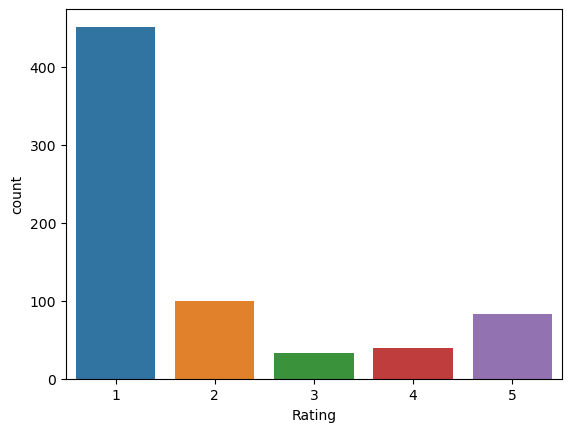

In [26]:
#analysing the rating:
import seaborn as sns
sns.countplot(x="Rating",data=data)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your existing DataFrame
# Calculate the count of each day of the week
day_of_week_counts = data['Day_of_the_week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day_of_the_week', 'Count']


day_labels = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

# Map the day names to custom labels
day_of_week_counts['Day_of_the_week'] = day_of_week_counts['Day_of_the_week'].map(day_labels)
# Create a stacked bar chart
fig = px.bar(day_of_week_counts, 
             x='Day_of_the_week',  # X-axis: Day of the week
             y='Count',  # Y-axis: Rating count
             title=' Bar Chart of Count by Day of the Week',
             color='Day_of_the_week')  # Color bars by day of the week

# Show the plot
fig.show()



In [28]:
# Calculate the count of each rating
Months = data["Month"].value_counts().reset_index()

Months.columns = ['Month', 'Count']
month_labels = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'}

# Map the day names to custom labels
Months['Month'] = Months['Month'].map(month_labels)

# Create a pie chart
fig = px.pie(
    Months,
    values='Count',
    names='Month',
    title='Month Distribution',
    hole=0.4  # Adjust the size of the hole in the pie chart
)

# Customize hovertemplate to include slash between Rating and Count
fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}: %{percent}<br>Count: %{value}',
)

fig.show()

In [29]:
import plotly.express as px

# Assuming you have a DataFrame called 'data' with columns 'Month' and 'Rating'

# Calculate the count of each rating per month
rating_counts = data.groupby('Year')['Rating'].count().reset_index()



# Create a line graph
fig = px.line(
    rating_counts,
    x='Year',
    y='Rating',
    title='Rating Count Over Months',
    labels={'Year': 'Year', 'Rating': 'Count'},
    line_shape='linear',  # You can change this to 'linear', 'spline', 'hv', or other options
)

# Customize the appearance of the line graph
fig.update_traces(
    mode='lines+markers',  # Display both lines and markers at data points
    marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')),  # Customize marker size and appearance
)

# Customize the layout of the graph
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=rating_counts['Year'], ticktext=rating_counts['Year']),
)

fig.show()


In [30]:
import plotly.express as px

# Assuming you have a DataFrame called 'data' with a column 'Day'

# Define a function to categorize days into 'Month Start', 'Mid Month', or 'Month End'
def categorize_day(day):
    if 1 <= day <= 10:
        return 'Month Start'
    elif 11 <= day <= 20:
        return 'Mid Month'
    else:
        return 'Month End'

# Apply the categorization function to create a new column 'Day Group'
data['Day Group'] = data['Day'].apply(categorize_day)

# Calculate the count of each day group
day_group_counts = data['Day Group'].value_counts().reset_index()

# Create a bar graph
fig = px.bar(
    day_group_counts,
    x='index',
    y='Day Group',
    title='Day Group Counts',
    labels={'index': 'Day Group', 'Day Group': 'Count'},
    color='index',  # Color bars by the day group
)

# Customize the appearance of the bar graph
fig.update_traces(
    marker=dict(line=dict(width=2, color='DarkSlateGrey')),  # Customize marker appearance
)

fig.show()


### *BI-VARIATE ANALYSIS 

In [31]:
import plotly.express as px
import pandas as pd

# Assuming 'data' is your existing DataFrame

# Create a cross-tabulation to prepare the data for a stacked bar chart
cross_tab = pd.crosstab(data['Day_of_the_week'], data['Rating'])

# Reset the index to have 'Day_of_the_week' as a regular column
cross_tab = cross_tab.reset_index()

# Rename columns for clarity (if needed)
cross_tab.columns = ['Day_of_the_week', 'Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']

# Create a stacked bar chart
fig = px.bar(cross_tab, 
             x='Day_of_the_week',  # X-axis: Day of the week
             y=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'],  # Y-axis: Ratings 1 to 5
             title='Stacked Bar Chart of Ratings by Day of the Week',
             labels={'Day_of_the_week': 'Day of the Week', 'variable': 'Rating'},
             category_orders={'Day_of_the_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})  # Specify the order of days of the week

# Show the plot
fig.show()


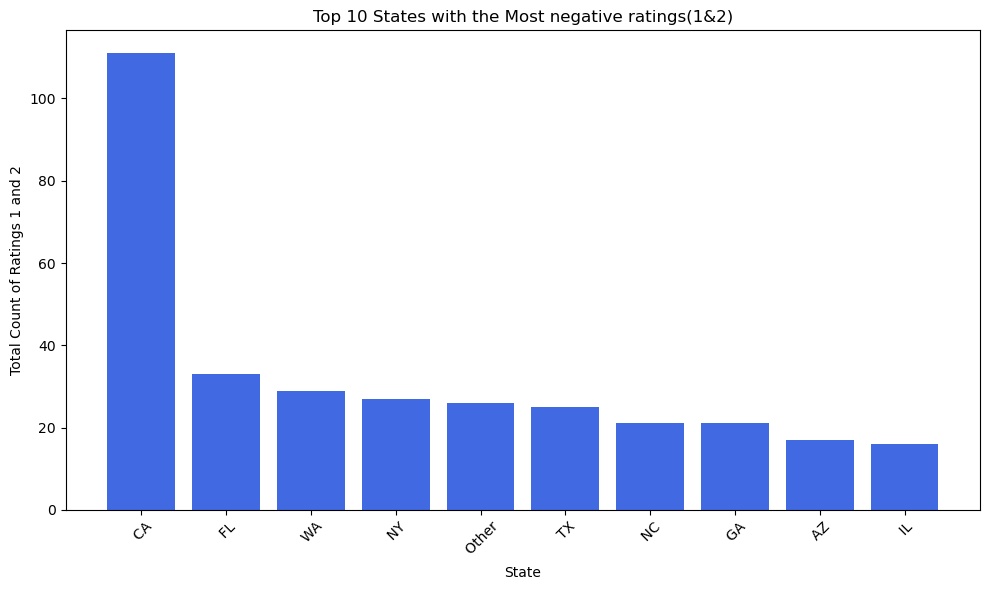

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([1, 2])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('State')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[1] + rating_counts[2]

# Sort the states by the total count in descending order and get the top 10
top_10_states = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states['Total'], color='royalblue')
plt.xlabel('State')
plt.ylabel('Total Count of Ratings 1 and 2')
plt.title('Top 10 States with the Most negative ratings(1&2)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()


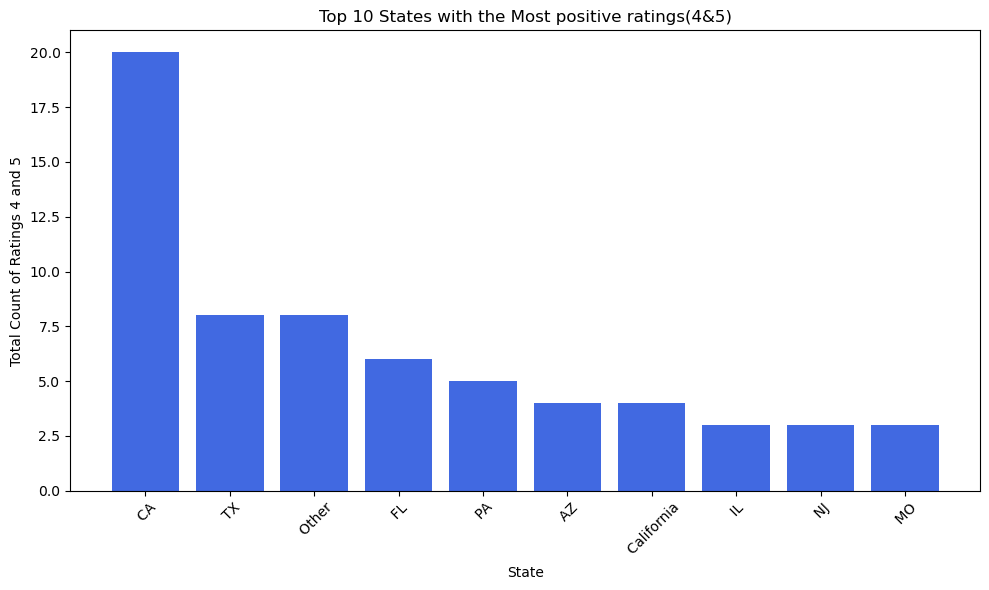

In [33]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([4, 5])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('State')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[4] + rating_counts[5]

# Sort the states by the total count in descending order and get the top 10
top_10_states = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states['Total'], color='royalblue')
plt.xlabel('State')
plt.ylabel('Total Count of Ratings 4 and 5')
plt.title('Top 10 States with the Most positive ratings(4&5)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()


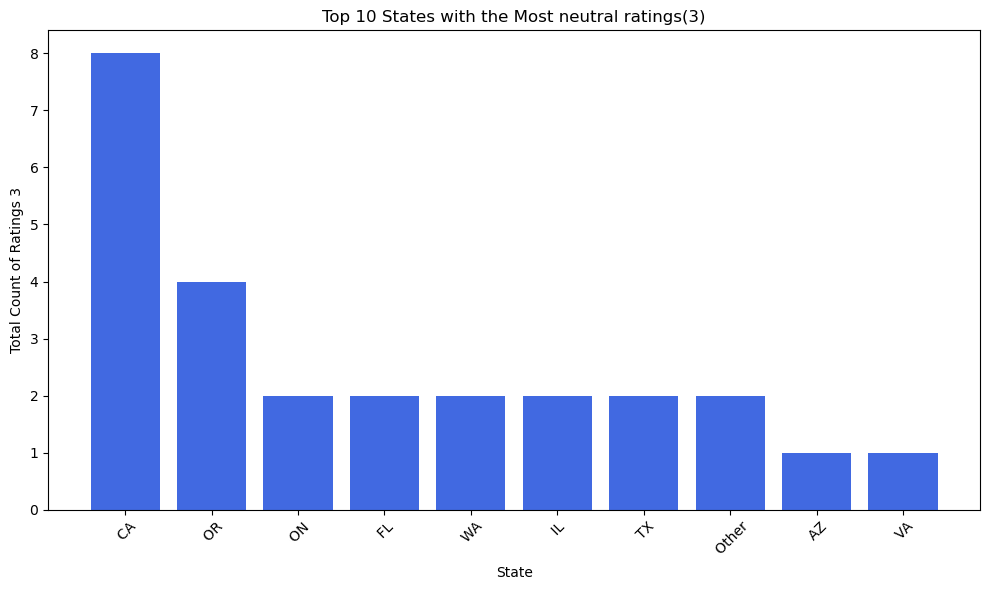

In [34]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([3])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('State')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[3]

# Sort the states by the total count in descending order and get the top 10
top_10_states = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states['Total'], color='royalblue')
plt.xlabel('State')
plt.ylabel('Total Count of Ratings 3')
plt.title('Top 10 States with the Most neutral ratings(3)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()


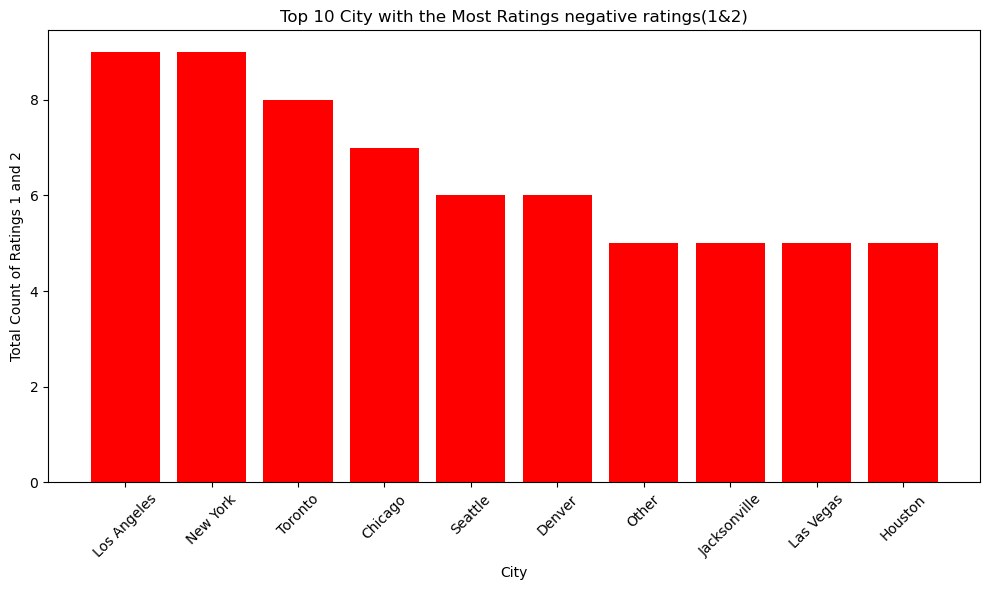

In [35]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([1, 2])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('City')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[1] + rating_counts[2]

# Sort the states by the total count in descending order and get the top 10
top_10_City = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_City.index, top_10_City['Total'], color='red')
plt.xlabel('City')
plt.ylabel('Total Count of Ratings 1 and 2')
plt.title('Top 10 City with the Most Ratings negative ratings(1&2)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()


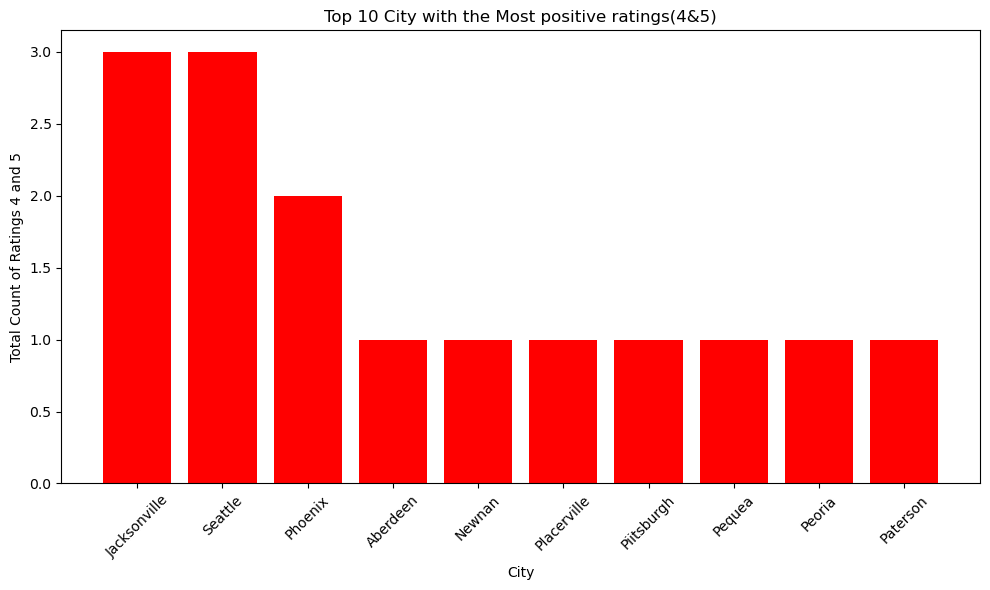

In [36]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([4,5])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('City')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[4] + rating_counts[5]

# Sort the states by the total count in descending order and get the top 10
top_10_City = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_City.index, top_10_City['Total'], color='red')
plt.xlabel('City')
plt.ylabel('Total Count of Ratings 4 and 5')
plt.title('Top 10 City with the Most positive ratings(4&5)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()

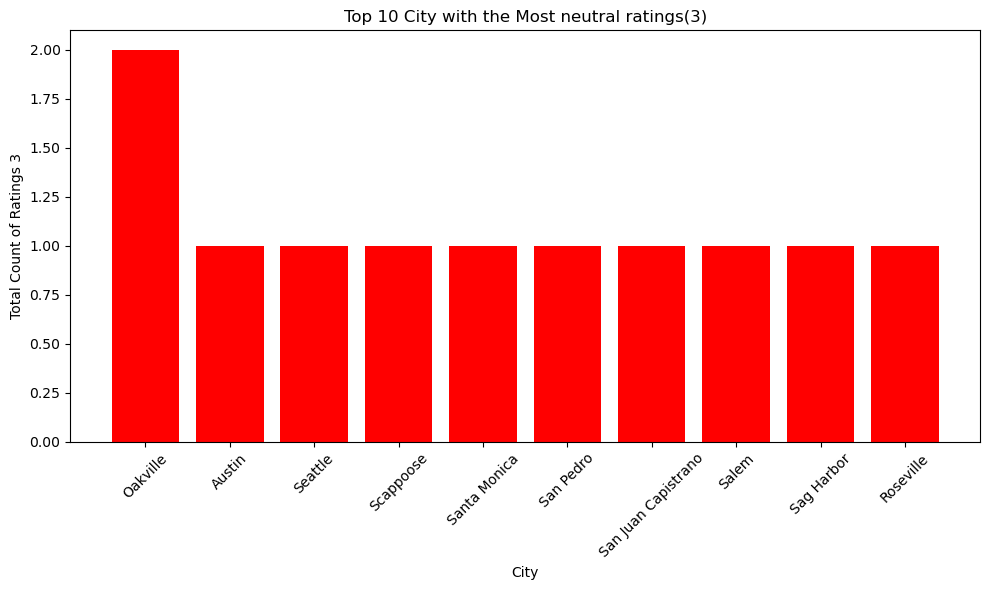

In [37]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for ratings 1 and 2
filtered_data = data[data['Rating'].isin([3])]

# Group by state and count ratings 1 and 2
rating_counts = filtered_data.groupby('City')['Rating'].value_counts().unstack(fill_value=0)

# Sum counts of ratings 1 and 2 to get the total count per state
rating_counts['Total'] = rating_counts[3] 

# Sort the states by the total count in descending order and get the top 10
top_10_City = rating_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_City.index, top_10_City['Total'], color='red')
plt.xlabel('City')
plt.ylabel('Total Count of Ratings 3')
plt.title('Top 10 City with the Most neutral ratings(3)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()

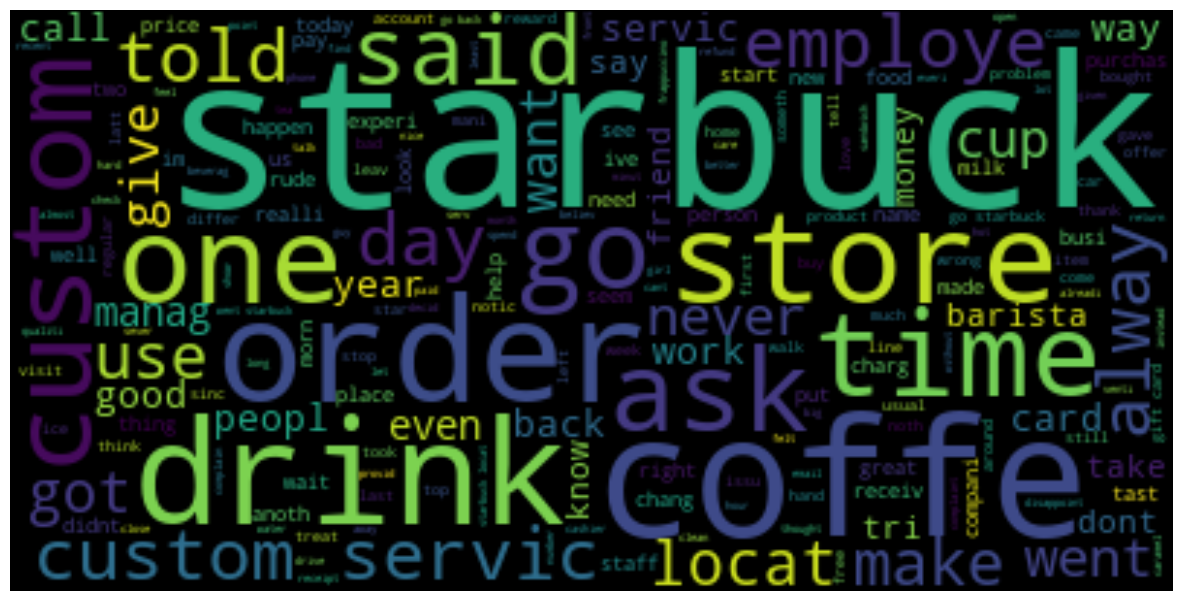

In [38]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Model buliding 

In [39]:
#import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
#nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
#NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which returns a dictionary of sentiment scores for a given text.

# Calculate sentiment scores for each review
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]



In [40]:
data

index State           City       Date  Rating  \
0        0    TX  Wichita Falls 2023-09-13       5   
1        1    FL         Apopka 2023-07-16       5   
2        2    PA  Cranberry Twp 2023-07-05       5   
3        3    WA        Seattle 2023-05-26       5   
4        4    OR        Gresham 2023-01-22       5   
..     ...   ...            ...        ...     ...   
700    700    CA         Cotati 2011-10-02       1   
701    701    ON       Oakville 2011-08-31       3   
702    702    NY             Ny 2011-08-24       1   
703    703    CA      La Puente 2011-08-15       1   
704    749    IL        Beecher 2010-02-06       5   

                                                Review  Month  Year  \
0    amber ladonna starbuck southwest parkway alway...      9  2023   
1     starbuck fire station  altamont spring fl mad...      7  2023   
2    want go way recogn starbuck employe billi fran...      7  2023   
3    friend starbuck card didn't work thank worker ...      5  2023   
4    i'm kick drink  cup warm water work instacart ...      1  2023   
..                                                 ...    ...   ...   
700  order via starbuck coffe onlin receiv email st...     10  2011   
701  name ric  journalist profess im send letter st...      8  2011   
702                           bagel ice cold cut toast      8  2011   
703  morn monday august    cowork stop starbuck buy...      8  2011   
704  found coffe starbuck overr tast survey bitter ...      2  2010   

     Day_of_the_week  Day    Day Group  Positive  Negative  Neutral  
0                  2   13    Mid Month     0.286     0.000    0.714  
1                  6   16    Mid Month     0.338     0.080    0.582  
2                  2    5  Month Start     0.258     0.146    0.596  
3                  4   26    Month End     0.354     0.169    0.476  
4                  6   22    Month End     0.362     0.000    0.638  
..               ...  ...          ...       ...       ...      ...  
700                6    2  Month Start     0.067     0.104    0.829  
701                2   31    Month End     0.000     0.068    0.932  
702                2   24    Month End     0.000     0.344    0.656  
703                0   15    Mid Month     0.063     0.073    0.864  
704                5    6  Month Start     0.215     0.067    0.718  

[705 rows x 14 columns]

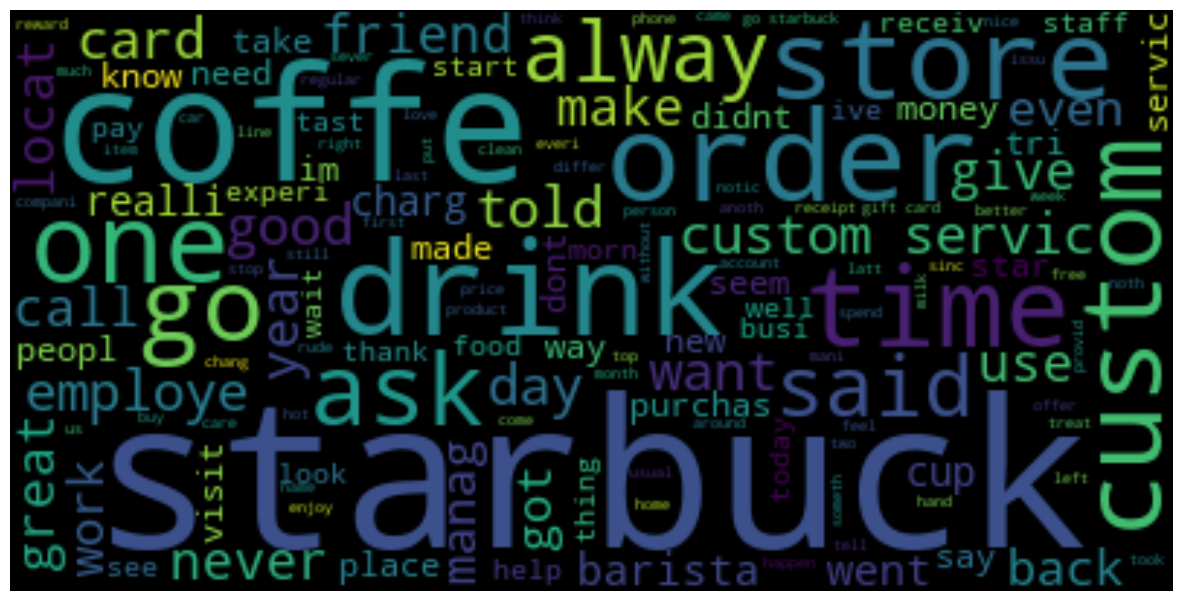

In [41]:
positive =' '.join([i for i in data['Review'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

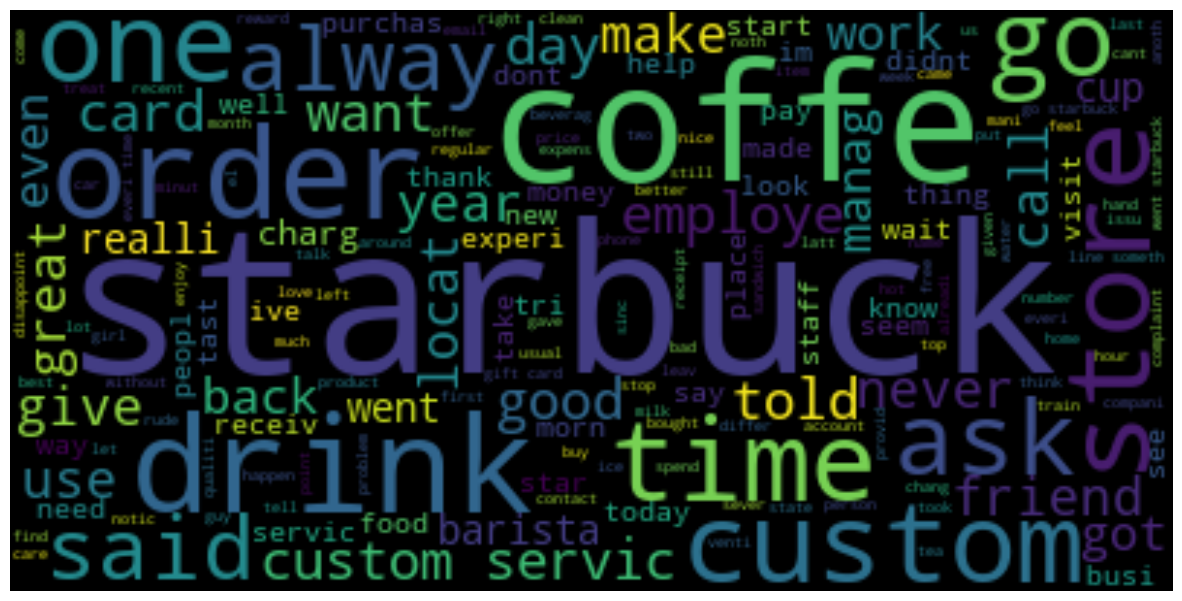

In [42]:
negative =' '.join([i for i in data['Review'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Calculating the ratings for Nan value

In [43]:
rows_with_nan

location                    Date  Rating  \
704      Kansas City, MO  Reviewed July 25, 2011     NaN   
705      Kansas City, MO  Reviewed July 25, 2011     NaN   
706           Revere, ma  Reviewed June 26, 2011     NaN   
707  Macclesfield, Other  Reviewed Jan. 13, 2011     NaN   
708          Jenison, MI   Reviewed Jan. 4, 2011     NaN   
..                   ...                     ...     ...   
845     Agoura Hills, CA  Reviewed July 13, 2006     NaN   
846         Goodrich, MI   Reviewed Jan. 3, 2005     NaN   
847   Valley Village, CA   Reviewed Nov. 5, 2004     NaN   
848        Fallbrook, CA  Reviewed Oct. 20, 2004     NaN   
849           Ramsey, NJ  Reviewed July 19, 2000     NaN   

                                                Review  
704  I just wanted to amend my email the I sent to ...  
705  Recently, I have gone to your Starbucks at Bar...  
706  Upon my first visit to this location on my way...  
707  Recently, British Royal Marines in Iraq wrote ...  
708  On the way to catch our plane, we got a medium...  
..                                                 ...  
845  I ordered two venti frappacino's without whipp...  
846                                     No Review Text  
847  DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...  
848                                     No Review Text  
849                                     No Review Text  

[145 rows x 4 columns]

In [44]:
rows_with_nan["Review"]=rows_with_nan["Review"].apply(clean)

In [45]:
rows_with_nan

location                    Date  Rating  \
704      Kansas City, MO  Reviewed July 25, 2011     NaN   
705      Kansas City, MO  Reviewed July 25, 2011     NaN   
706           Revere, ma  Reviewed June 26, 2011     NaN   
707  Macclesfield, Other  Reviewed Jan. 13, 2011     NaN   
708          Jenison, MI   Reviewed Jan. 4, 2011     NaN   
..                   ...                     ...     ...   
845     Agoura Hills, CA  Reviewed July 13, 2006     NaN   
846         Goodrich, MI   Reviewed Jan. 3, 2005     NaN   
847   Valley Village, CA   Reviewed Nov. 5, 2004     NaN   
848        Fallbrook, CA  Reviewed Oct. 20, 2004     NaN   
849           Ramsey, NJ  Reviewed July 19, 2000     NaN   

                                                Review  
704  want amend email sent hour ago rude obnoxi emp...  
705  recent gone starbuck barri rd kansa citi mo em...  
706  upon first visit locat way work went get cup c...  
707  recent british royal marin iraq wrote starbuck...  
708  way catch plane got medium coffe  medium hot c...  
..                                                 ...  
845  order two venti frappacino without whip cream ...  
846                                        review text  
847  demand tip made wait coffe cold melt   yet add...  
848                                        review text  
849                                        review text  

[145 rows x 4 columns]

In [46]:
rows_with_nan["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in rows_with_nan["Review"]]
rows_with_nan["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in rows_with_nan["Review"]]
rows_with_nan["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in rows_with_nan["Review"]]


In [47]:
rows_with_nan

location                    Date  Rating  \
704      Kansas City, MO  Reviewed July 25, 2011     NaN   
705      Kansas City, MO  Reviewed July 25, 2011     NaN   
706           Revere, ma  Reviewed June 26, 2011     NaN   
707  Macclesfield, Other  Reviewed Jan. 13, 2011     NaN   
708          Jenison, MI   Reviewed Jan. 4, 2011     NaN   
..                   ...                     ...     ...   
845     Agoura Hills, CA  Reviewed July 13, 2006     NaN   
846         Goodrich, MI   Reviewed Jan. 3, 2005     NaN   
847   Valley Village, CA   Reviewed Nov. 5, 2004     NaN   
848        Fallbrook, CA  Reviewed Oct. 20, 2004     NaN   
849           Ramsey, NJ  Reviewed July 19, 2000     NaN   

                                                Review  Positive  Negative  \
704  want amend email sent hour ago rude obnoxi emp...     0.124     0.109   
705  recent gone starbuck barri rd kansa citi mo em...     0.252     0.144   
706  upon first visit locat way work went get cup c...     0.000     0.104   
707  recent british royal marin iraq wrote starbuck...     0.280     0.118   
708  way catch plane got medium coffe  medium hot c...     0.291     0.064   
..                                                 ...       ...       ...   
845  order two venti frappacino without whip cream ...     0.186     0.000   
846                                        review text     0.000     0.000   
847  demand tip made wait coffe cold melt   yet add...     0.000     0.341   
848                                        review text     0.000     0.000   
849                                        review text     0.000     0.000   

     Neutral  
704    0.766  
705    0.605  
706    0.896  
707    0.602  
708    0.645  
..       ...  
845    0.814  
846    1.000  
847    0.659  
848    1.000  
849    1.000  

[145 rows x 7 columns]

In [48]:
import pandas as pd

# Assuming you have a DataFrame called 'rows_with_nan'

def assign_rating(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        if 0.1 <= row['Positive'] <= 0.4:
            return 4
        elif 0.5 <= row['Positive'] <= 0.9:
            return 5
    elif row['Negative'] > row['Positive'] and row['Negative'] > row['Neutral']:
        if 0.1 <= row['Negative'] <= 0.4:
            return 2
        elif 0.5 <= row['Negative'] <= 0.9:
            return 1
    elif row['Neutral'] >= row['Positive'] and row['Neutral'] >= row['Negative']:
        return 3

# Apply the 'assign_rating' function to each row and create a new 'Rating' column
rows_with_nan['Rating'] = rows_with_nan.apply(assign_rating, axis=1)

# Now, 'rows_with_nan' contains the 'Rating' column with the assigned ratings


In [49]:
rows_with_nan['Rating']

704    3
705    3
706    3
707    3
708    3
      ..
845    3
846    3
847    3
848    3
849    3
Name: Rating, Length: 145, dtype: int64